In [1]:
import numpy as np
import porepy as pp
from matplotlib import pyplot as plt
from thermal_runscript_4 import make_model, run_model
from plot_utils import *

common_params = {
    "geometry": "4h_steady",
    "save_matrix": False,
    "solver": "CPR",
    "grid_refinement": 5,
}

print("Running steady state")
params = {
    "steady_state": True,
} | common_params
model = run_model(params)
end_state_filename = params["end_state_filename"]

print("Running injection")
params = {
    "steady_state": False,
    "initial_state": end_state_filename,
    "end_time": 5e2,
} | common_params
model = run_model(params)

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Running steady state

stats_thermal_geo4h_steadyx5_solCPR

Sim time: 1.00e+00, Dt: 1.00e+00 (days)
Temperature: 393.00, 393.00
Peclet: 0.0e+00, CFL: 6.3e-16
sticking: 115, sliding: 0, open: 0


/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Construction took: 0.24
  0 KSP Residual norm 4.747390372816e+00 
  1 KSP Residual norm 5.626680232178e-01 
  2 KSP Residual norm 1.584948697068e-01 
  3 KSP Residual norm 3.861043450576e-02 
  4 KSP Residual norm 1.241941898832e-02 
  5 KSP Residual norm 4.301971252641e-03 
  6 KSP Residual norm 1.549123001347e-03 
  7 KSP Residual norm 6.055618311118e-04 
  8 KSP Residual norm 2.286498278000e-04 
  9 KSP Residual norm 1.475249077898e-04 
 10 KSP Residual norm 8.015125671987e-05 
 11 KSP Residual norm 2.544882740070e-05 
 12 KSP Residual norm 7.103511024990e-06 
 13 KSP Residual norm 2.173041100392e-06 
 14 KSP Residual norm 5.967289595908e-07 
 15 KSP Residual norm 1.367507218277e-07 
 16 KSP Residual norm 3.463630782402e-08 
 17 KSP Residual norm 7.704923290565e-09 
 18 KSP Residual norm 1.706747755035e-09 
 19 KSP Residual norm 3.833772732927e-10 
 20 KSP Residual norm 1.067276424039e-10 
 21 KSP Residual norm 2.807027830443e-11 
 22 KSP Residual norm 7.432846315148e-12 
 23 KSP Re

In [ ]:
model.load_data_from_pvd(Path('/home/porepy/volume/nrec_fhm/thermal/visualization_2d/data_000043.pvd'), times_file=Path('/home/porepy/volume/nrec_fhm/thermal/visualization_2d/times.json'), is_mdg_pvd=True)

In [2]:
subdomains = model.mdg.subdomains()
source_loc_x = 1000
source_loc_y = 1000
fractures = [sd for sd in subdomains if sd.dim == model.nd - 1]

x, y, z = np.concatenate([sd.cell_centers for sd in fractures], axis=1)
source_loc = np.argmin((x - source_loc_x) ** 2 + (y - source_loc_y) ** 2)
x_well, y_well = x[source_loc], y[source_loc]
x_well, y_well

(890.2882102529732, 1016.1876111503439)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


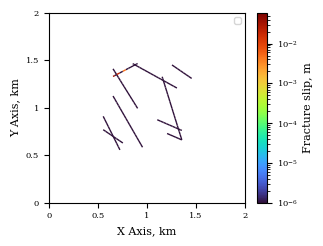

In [28]:
from matplotlib import pyplot as plt
from porepy.viz.plot_grid import _plot_sd_1d, _color_map

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
}

plt.rcParams.update(tex_fonts)

width = 235 / 72
height = 180 / 72
fractures = model.mdg.subdomains(dim=model.nd - 1)
u_jump_t = abs(model.equation_system.evaluate(model.u_jump_t(fractures)))
u_jump_t[u_jump_t < 1e-6] = 1e-6
# u_jump_t[:] = 1
color_map=_color_map([u_jump_t.min(), u_jump_t.max()], 'turbo')

fig = plt.figure(figsize=(width, height))
ax = fig.gca()
kwargs = dict(
    plot_2d=True, fracturewidth_1d=1, linewidth=0.1, if_plot=False, axis=ax, pointsize=0
)
# pp.plot_grid(model.mdg, alpha=0, **kwargs)
for frac in fractures:
    vals = abs(model.equation_system.evaluate(model.u_jump_t([frac])))
    vals[vals < 1e-6] = 1e-6
    # vals[:] = 1
    _plot_sd_1d(
        frac,
        vals,
        ax=ax,
        alpha=1,
        color_map=color_map, 
        **kwargs
    )
cbar = fig.colorbar(color_map, ax=ax)
cbar.set_label('Fracture slip, m')
ax.set_xlabel('X Axis, km')
ax.set_ylabel('Y Axis, km')
ax.set_title('')
ax.set_xticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
ax.set_yticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
# ax.scatter(x_well, y_well, label='Well', marker='.', s=20, color='blue')
ax.legend()
ax.set_xlim(0, 2000)
ax.set_ylim(0, 2000)
# pp.plot_grid(model.mdg, cell_value='temperature', plot_2d=True, alpha=1, fracturewidth_1d=2, linewidth=0, if_plot=False, color_map='turbo', axis=ax[1])

plt.tight_layout()

plt.savefig('tmp.pdf')

In [6]:
u_jump_t

array([ 1.00000000e-06,  1.00000000e-06,  1.33226763e-15,  0.00000000e+00,
       -1.11022302e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.22044605e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.66133815e-16,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
       -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.11022302e-16,  0.00000000e+00, -1.44328993e-15,  0.00000000e+00,
        1.11022302e-16,  0.00000000e+00,  1.33226763e-15,  0.00000000e+00,
        1.77635684e-15,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
       -2.22044605e-16,  0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.22044605e-16,  0.00000000e+00,
       -2.22044605e-16,  0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
       -2.22044605e-16,  

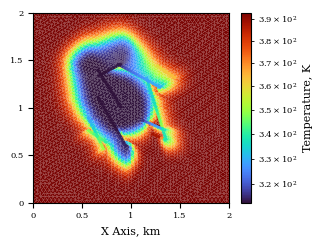

In [30]:
fig = plt.figure(figsize=(width, height))
ax = fig.gca()
pp.plot_grid(model.mdg, cell_value='temperature', plot_2d=True, alpha=1, fracturewidth_1d=2, linewidth=0, if_plot=False, color_map='turbo', axis=ax)

ax.set_xlabel('X Axis, km')
ax.set_ylabel('')
ax.set_title('')
ax.set_xticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
ax.set_yticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])

plt.tight_layout()

# plt.savefig('tmp.pdf')